<a href="https://colab.research.google.com/github/Lenakirara/QuarentenaDados_Alura/blob/master/quarentenaDados_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 01

- Analisando dados do MovieLens

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [197]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
# filmes - dataframe // .head() busca as 5 primeiras posições
filmes.columns = ['filmeId', 'título', 'genero']
filmes.head()

,filmeId,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#traz a documentação de filmes.head
#lendo a documentação de um metodo/atributo
?filmes.head

In [0]:
#lendo a documentação do tipo (docstring)
?filmes

In [200]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [201]:
#renomear as colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [202]:
avaliacoes.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [203]:
#verifica as informações de avaliacoes
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [204]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [205]:
avaliacoes.query('filmeId == 1').mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [206]:
#media das notas
nota_media_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
nota_media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [207]:
#juntar informaçoes - JOIN
filmes_com_media = filmes.join(nota_media_por_filme, on = 'filmeId')
filmes_com_media.head()

,filmeId,título,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [208]:
filmes_com_media.sort_values('nota')

,filmeId,título,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [209]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,título,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


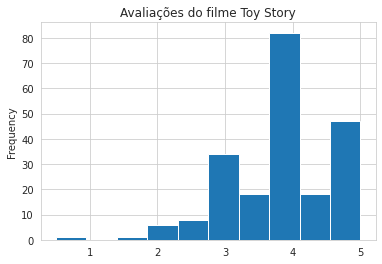

In [210]:

avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')
plt.show()

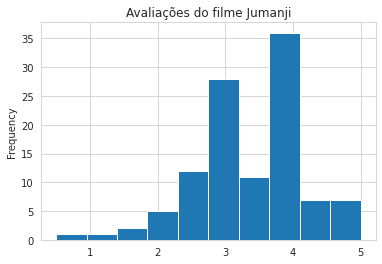

In [211]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Jumanji')
plt.show()

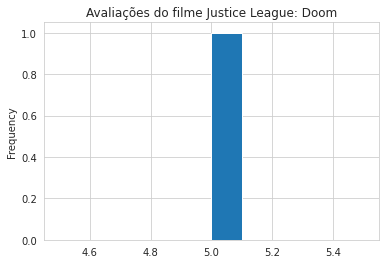

In [212]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist',
                                                   title='Avaliações do filme Justice League: Doom')
plt.show()

### DESAFIOS - AULA 01



- DESAFIO 01 : O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [213]:
filmes_sem_avaliacao = filmes_com_media['nota'].isnull()
filmes_com_media[filmes_sem_avaliacao]

,filmeId,título,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


- DESAFIO 02: Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [214]:
filmes_com_media = filmes_com_media.rename(columns={'nota' : 'nota_media'})
filmes_com_media.head()

,filmeId,título,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


- DESAFIO 03: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [215]:
total_votos = avaliacoes['nota']
filmes_com_media_votos = filmes_com_media.join(total_votos, on='filmeId')
filmes_com_media_votos = filmes_com_media_votos.rename(columns={'nota' : 'total_votos'})
filmes_com_media_votos.head(10)

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,5.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,4.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,5.0
8,9,Sudden Death (1995),Action,3.125000,5.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,5.0


- DESAFIO 04: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [216]:
filmes_com_media_votos['nota_media'] = filmes_com_media_votos['nota_media'].round(2)
filmes_com_media_votos.head()

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0


- DESAFIO 05: Descobrir os generos dos filmes (quais são eles, únicos). 

In [217]:
diferentes_generos = filmes_com_media_votos.genero.str.get_dummies('|')
genero = diferentes_generos.columns.to_list()
genero

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

- DESAFIO 06: Contar o número de aparições de cada genero.

In [218]:
qtd_generos = filmes_com_media_votos.genero.str.get_dummies('|').sum()
qtd_generos

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

- DESAFIO 07: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

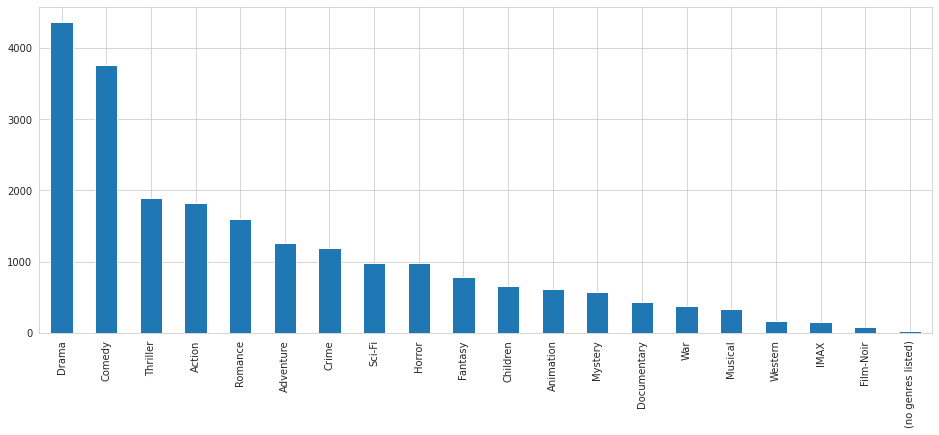

In [219]:
qtd_generos.sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.show()

# AULA 02

- Descobrindo boas práticas de visualização de dados e Boxplot.

In [220]:
#tratar esses 'generos' como string - .str - depois varias funçoes de string para o pandas
#get_dummies :: cria varias variaveis
filmes['genero'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
#somando as colunas
filmes['genero'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [222]:
#colocando em ordem decrescente
#é uma serie de valores - tem apenas uma coluna
#os nomes que aparecem são índices
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [223]:
#puxando o index
#aparece o dataframe
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [224]:
#percebe-se que o indice de filmes vai de 0 até 9742
filmes

,filmeId,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [225]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [226]:
#puxando novamente (somente) o indice
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [227]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [228]:
#alterando o sort_values para 'sort_index'
filmes['genero'].str.get_dummies('|').sum().sort_index(ascending=False)

Western                167
War                    382
Thriller              1894
Sci-Fi                 980
Romance               1596
Mystery                573
Musical                334
IMAX                   158
Horror                 978
Film-Noir               87
Fantasy                779
Drama                 4361
Documentary            440
Crime                 1199
Comedy                3756
Children               664
Animation              611
Adventure             1263
Action                1828
(no genres listed)      34
dtype: int64

In [229]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=True)

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

In [230]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).head()


Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

OBS: FILMES É UM DATAFRAME E QUANDO EU SOLICITO UMA COLUNA SERIA UM SeRIES - MAS SE PEDIR DUaS COLUNAS PEDE UM OUTRO DATAFRAME. UM DATAFRAME NÃO É UM SeRIeS
pandas.series.str

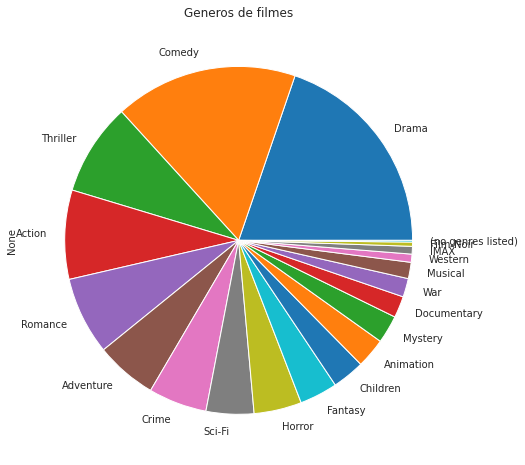

In [231]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Generos de filmes', 
    figsize=(8,8))
plt.show()
#repetição de  cores 

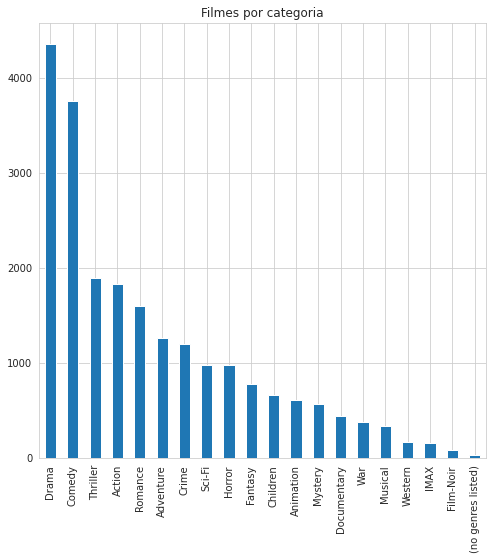

In [232]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

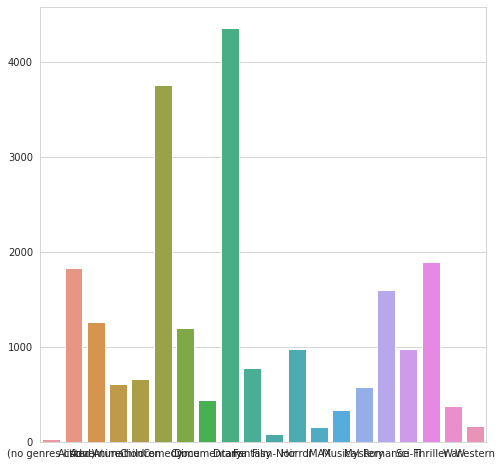

In [233]:
import seaborn as sns

filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_index()
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

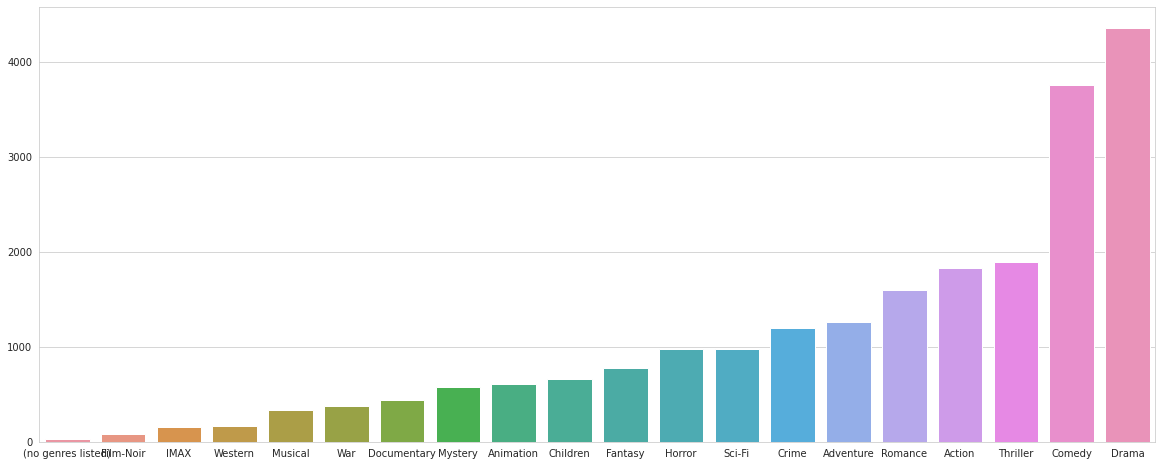

In [234]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values()
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

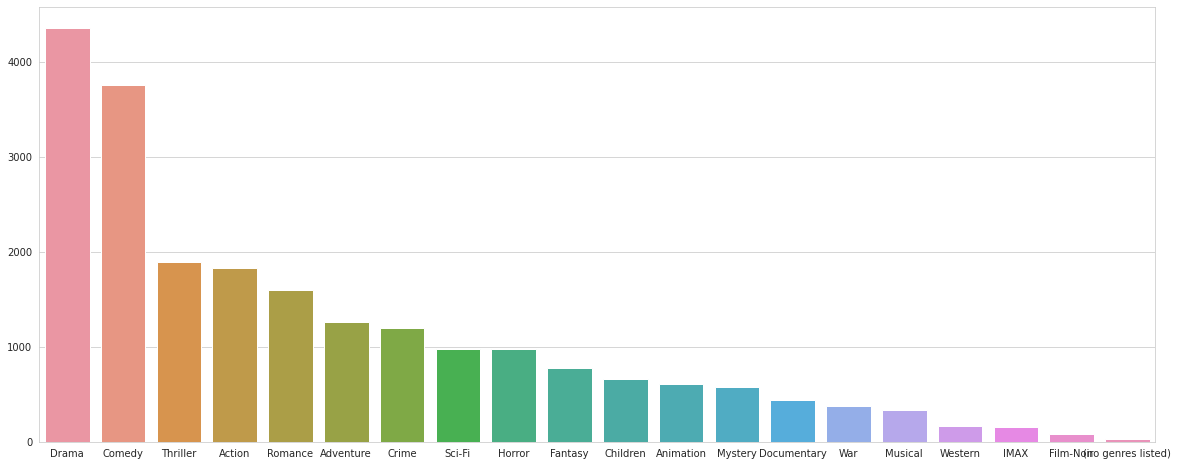

In [235]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

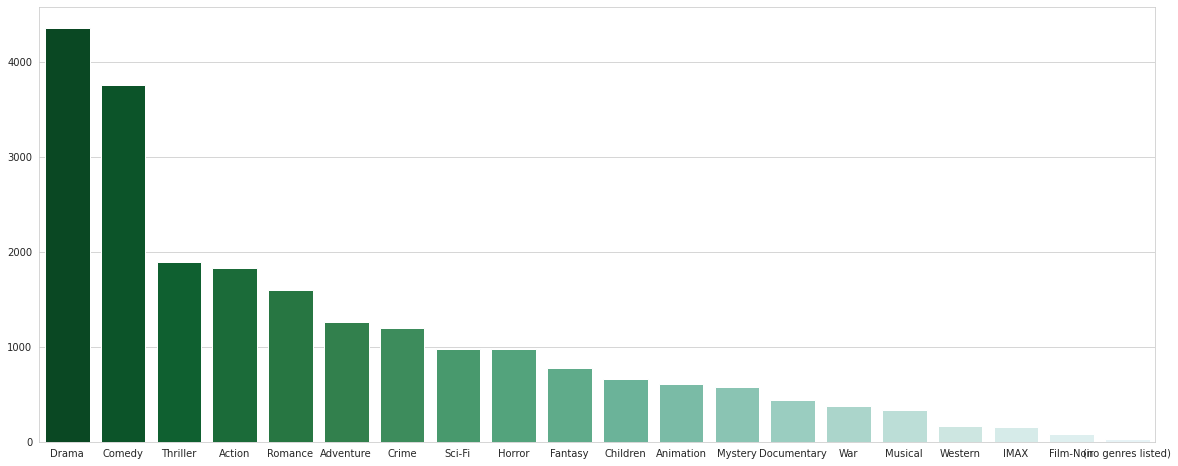

In [236]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 2))
#o '+ 2 ' foi colocado para que a ultima barra não fique tão clara
plt.show()

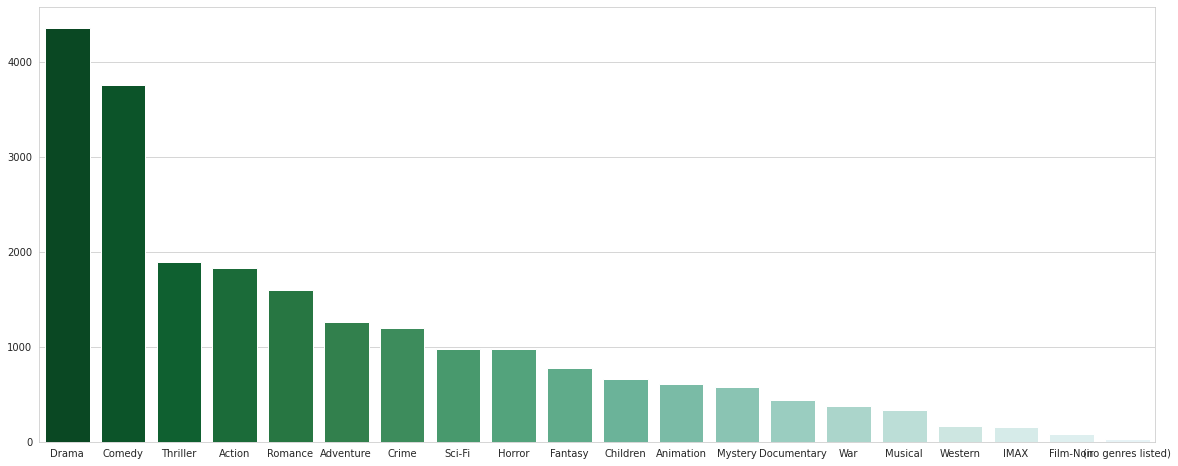

In [237]:
#aumentando o tamanho do eixo 'x'
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 2))

plt.show()

In [0]:
import seaborn as sns
#adicionamos o sns.set_style("whitegrid") para que todos os gráficos tenham a linha de grade do 
#eixo X evidênte, facilitando a comparação entre as barras.
sns.set_style('whitegrid')

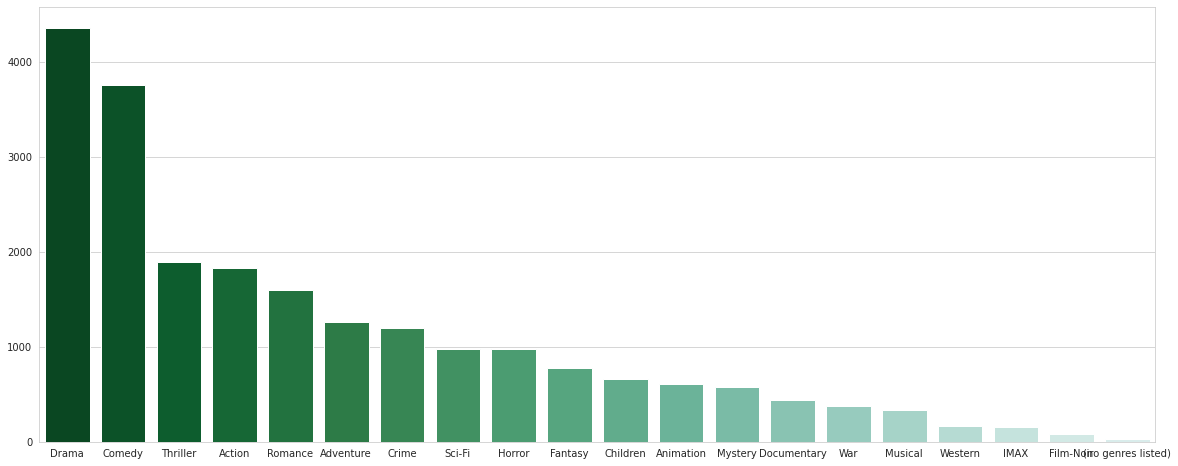

In [239]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 4))
#o '+ 4 ' foi colocado para que a ultima barra não fique tão clara
plt.show()


In [240]:
filmes_com_media.head()

,filmeId,título,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


*Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. Por exemplo, Toy Story e Jumanji
*

3.9209302325581397


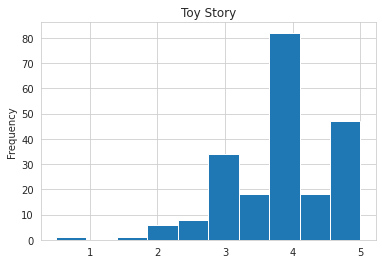

In [241]:
nota_filme_1 = avaliacoes.query('filmeId == 1')['nota']
print(nota_filme_1.mean())
nota_filme_1.plot(kind='hist', title='Toy Story')
plt.show()

3.4318181818181817


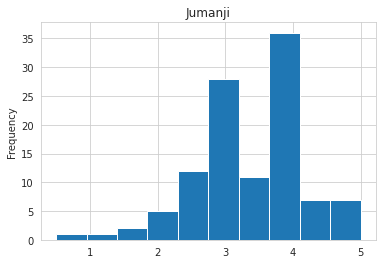

In [242]:
nota_filme_2 = avaliacoes.query('filmeId == 2')['nota']
print(nota_filme_2.mean())
nota_filme_2.plot(kind='hist', title='Jumanji')
plt.show()

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados.

Com isso iremos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.



In [243]:
nota_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [244]:
nota_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

Diferença entre os filmes analisados acima - entre o Toy Store e Jumanji a media no 50% tem uma diferença - no toy store em 50% esta com 4.0 enquanto jumanji está com 3.5

In [245]:
# pegando as avaliaçãoes e agrupando por filme
avaliacoes.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [246]:
filmes_com_media.sort_values('nota_media', ascending=False)[2450:2500]

,filmeId,título,genero,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

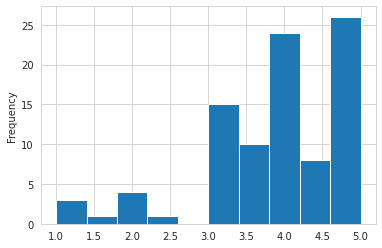

In [247]:
# pegar dois filmes acima
# definindo função
def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  # imprimindo o retorno
  return notas_filmes.describe()
# 919 - corresponde ao filme Mágico de Óz
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

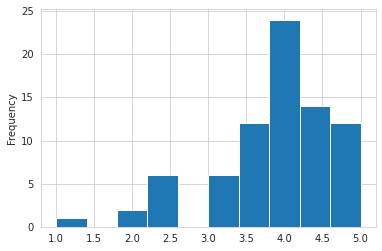

In [248]:
# 46578 - filme pequena miss sunshine
plot_filme(46578)

In [0]:
# gráfico para comparar a mediana - usando boxplot
def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  notas_filmes.plot.box()
 
  return notas_filmes.describe()
  

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

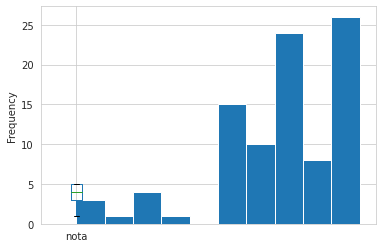

In [250]:
plot_filme(919)

In [0]:
# melhorando a analise do grafico anterior

def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  plt.show()
  notas_filmes.plot.box()
  plt.show()
  return notas_filmes.describe()

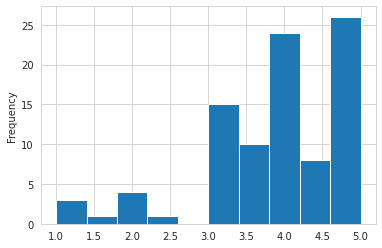

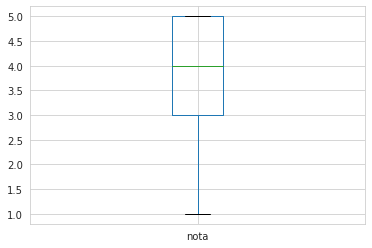

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [252]:
plot_filme(919)

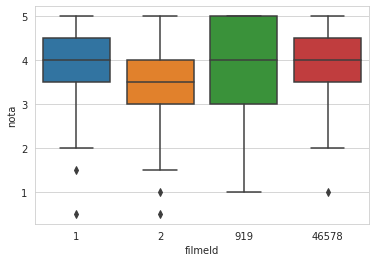

In [253]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

outlier - valor atípico - ponto muito fora da curva (por isso não vale a pena considerar - durante a análise)

### DESAFIOS - AULA 02 

- Desafio 01: Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

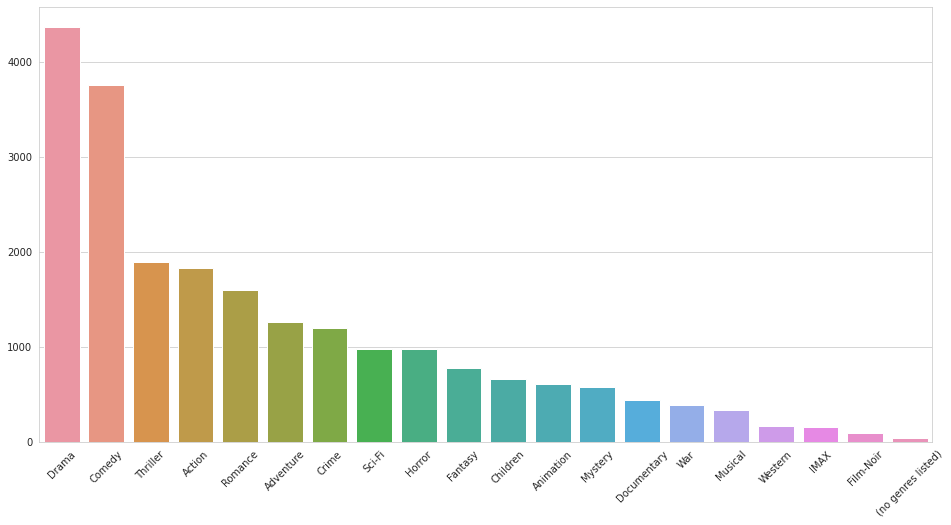

In [254]:
import seaborn as sns
sns.set_style('whitegrid')
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x=filmes_por_genero.index,
                 y=filmes_por_genero.values)
plt.xticks(rotation=45)
plt.show()

- Desafio 02 - Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

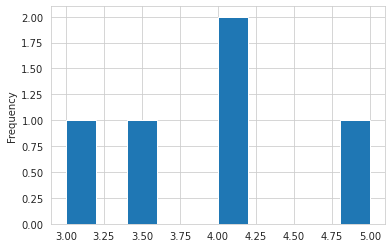

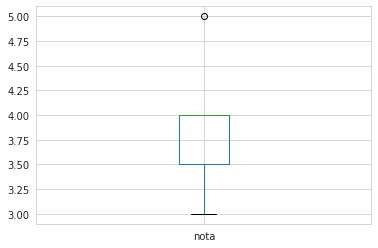

count    5.00000
mean     3.90000
std      0.74162
min      3.00000
25%      3.50000
50%      4.00000
75%      4.00000
max      5.00000
Name: nota, dtype: float64

In [255]:
# filme  Padrinhos de Tóquio - ano 2003
plot_filme(8607)

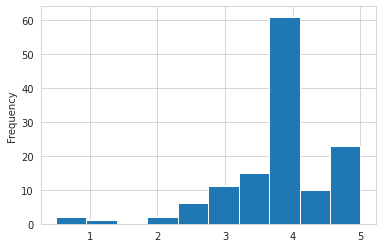

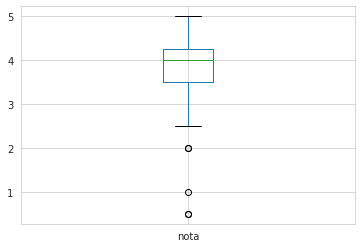

count    131.000000
mean       3.896947
std        0.849700
min        0.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: nota, dtype: float64

In [256]:
# filme O Exterminador do Futuro de 1984
plot_filme(1240)

- Desafio 03: Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

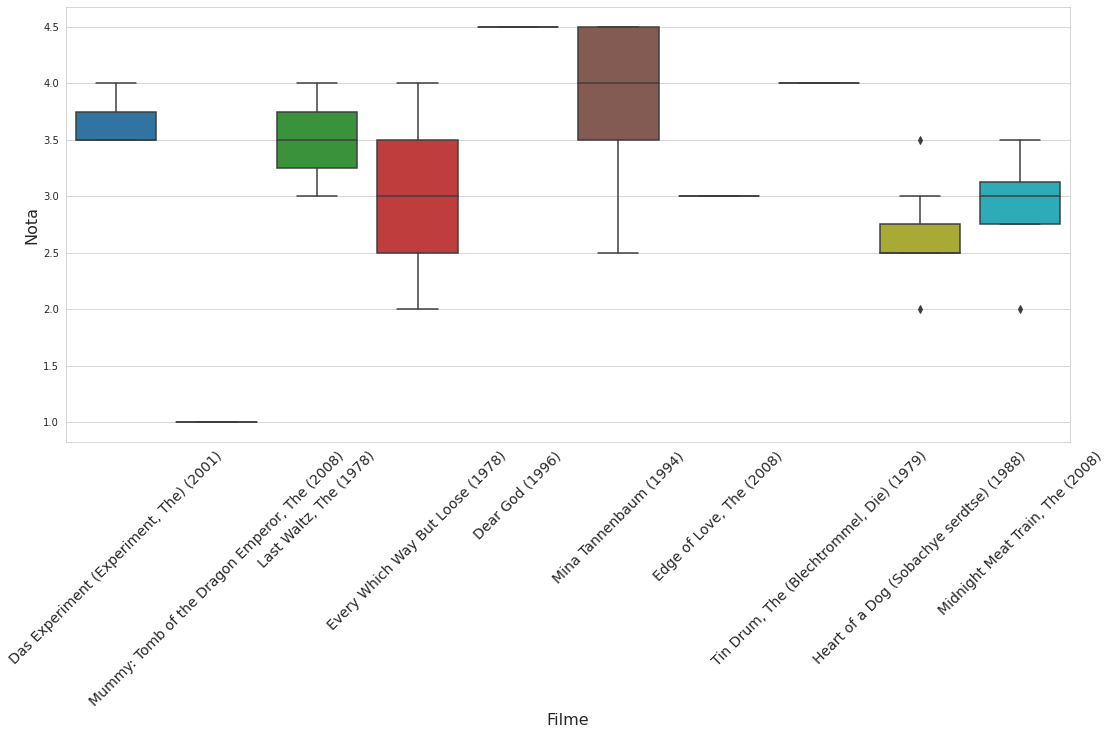

In [257]:
aval_top10 = filmes_com_media_votos.sort_values(by='total_votos', ascending=False).head(10)
aval_top10_titulos = aval_top10['título'].to_list()
aval_top10_ids = aval_top10['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {aval_top10_ids}"))
ax.set_xticklabels(aval_top10_titulos, fontsize=14)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

- Desafio 04: Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

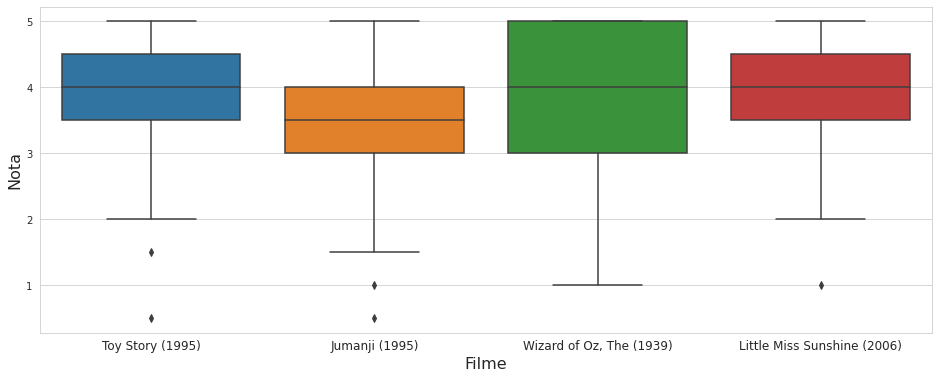

In [258]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['título'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

- Desafio 05: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def analisa_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    nota = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'**** Filme: {filme.iloc[0, 1]} ****\n')
    
    print(f'Moda: {nota.mode().values}')    
    print(f'Média: {nota.mean()}')
    print(f'Mediana: {nota.median()}')
    print()

In [260]:
analisa_filme(2710)
analisa_filme(172)
analisa_filme(19)

**** Filme: Blair Witch Project, The (1999) ****

Moda: [1. 4.]
Média: 2.796875
Mediana: 3.0

**** Filme: Johnny Mnemonic (1995) ****

Moda: [2.]
Média: 2.6792452830188678
Mediana: 3.0

**** Filme: Ace Ventura: When Nature Calls (1995) ****

Moda: [2.]
Média: 2.727272727272727
Mediana: 3.0



In [261]:
analisa_filme(110)
analisa_filme(1221)
analisa_filme(1387)

**** Filme: Braveheart (1995) ****

Moda: [5.]
Média: 4.031645569620253
Mediana: 4.0

**** Filme: Godfather: Part II, The (1974) ****

Moda: [5.]
Média: 4.25968992248062
Mediana: 4.5

**** Filme: Jaws (1975) ****

Moda: [5.]
Média: 4.0054945054945055
Mediana: 4.0



- Desafio 06: Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

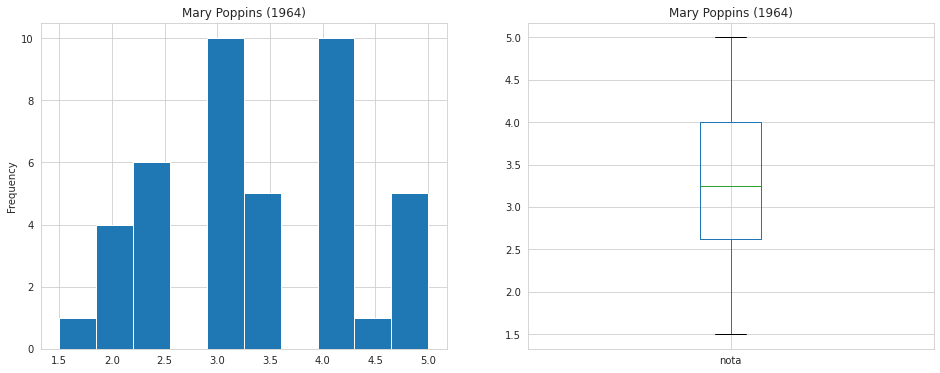

In [262]:
filme_785 = avaliacoes.query('filmeId == 785')['nota']

f, axes=plt.subplots(1, 2, figsize=(16,6))
filme_785.plot(kind='hist', ax=axes[0], title='Mary Poppins (1964)')
filme_785.plot(kind='box', ax=axes[1], title='Mary Poppins (1964)')
plt.show()

- Desafio 07: Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [263]:
filmes_media_ano = filmes_com_media.copy()
filmes_media_ano['ano'] = filmes_com_media['título'].str.extract("\((\d{4})\)")
filmes_media_ano.head()

,filmeId,título,genero,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


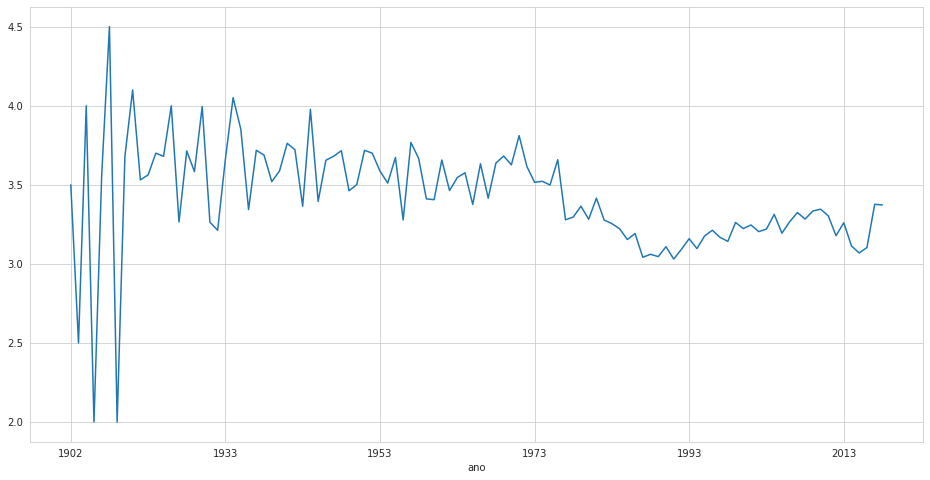

In [264]:
media_nota_ano = filmes_media_ano.groupby('ano')['nota_media'].mean()
plt.figure(figsize=(16, 8))
media_nota_ano.plot()